In [1]:
!git clone https://github.com/clovaai/CRAFT-pytorch

Cloning into 'CRAFT-pytorch'...


In [2]:
!cd C://Users//sanji//Desktop//AI-Projects-2//NeuralMachineTranslation//CRAFT-pytorch

In [ ]:
! install torchvision

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [6]:
!python CRAFT-pytorch//CsvGen.py --trained_model CRAFT-pytorch//craft_ic15_20k.pth --test_folder DataforOCR --cuda False

Loading weights from checkpoint (CRAFT-pytorch//craft_ic15_20k.pth)
Test image 1/1: DataforOCR\Image-2.jpg
elapsed time : 12.614122152328491s


c:\Users\sanji\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sanji\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [2]:
!python deep-text-recognition-benchmark//demo.py --Transformation None --FeatureExtraction VGG --SequenceModeling BiLSTM --Prediction CTC --saved_model CRAFT-pytorch//Model2.pth --image_folder Resultimgs

No Transformation module specified
model input parameters 32 100 20 1 512 256 37 25 None VGG BiLSTM CTC
loading pretrained model from CRAFT-pytorch//Model2.pth
--------------------------------------------------------------------------------
image_path               	 predicted_labels         	 confidence score
--------------------------------------------------------------------------------
Image-2_56.68016_369.55002_391.51685_394.17038_384.3045_492.25772_49.46785_467.63736.jpg	 image                    	 0.3245
Image-2_60.86602_248.55487_275.8565_254.87811_273.24805_343.5661_58.25756_337.24286.jpg	 how                      	 0.7098
Image-2_305.2_254.40002_420.63397_259.41888_417.0415_342.0453_301.60754_337.02643.jpg	 to                       	 0.9992
Image-2_400.4066_371.51163_508.77493_379.5389_502.31924_466.69034_393.9509_458.66306.jpg	 in                       	 0.8111
Image-2_442.0_248.0_716.0_248.0_716.0_340.0_442.0_340.0.jpg	 write                    	 0.5952
Image-2_531.4346_362

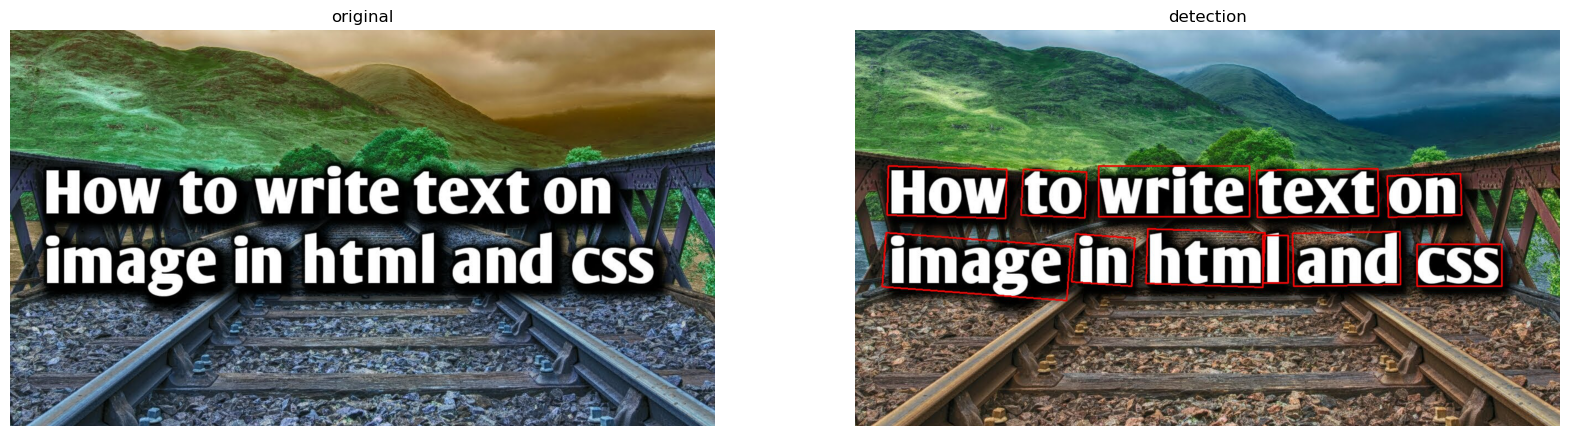

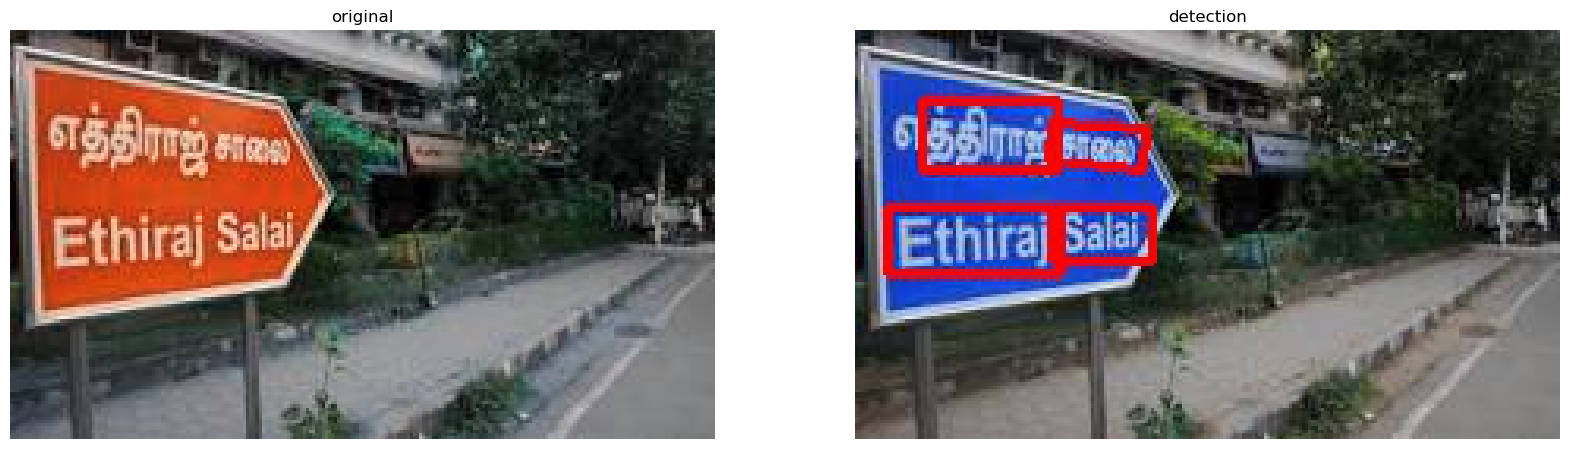

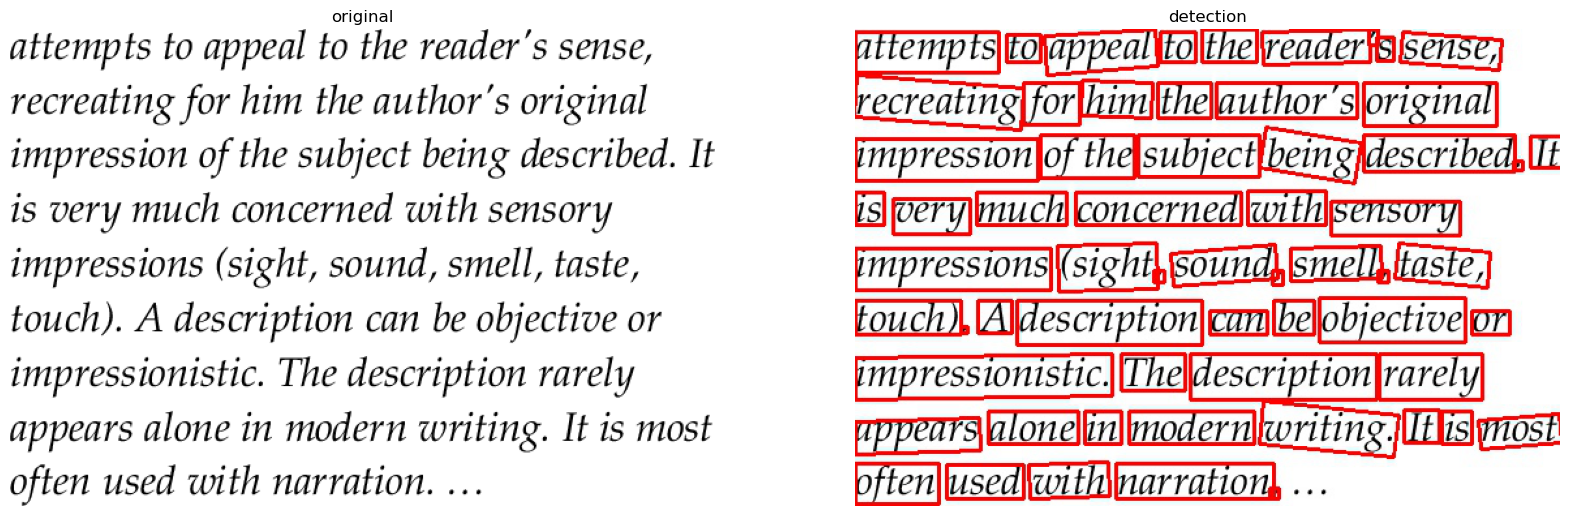

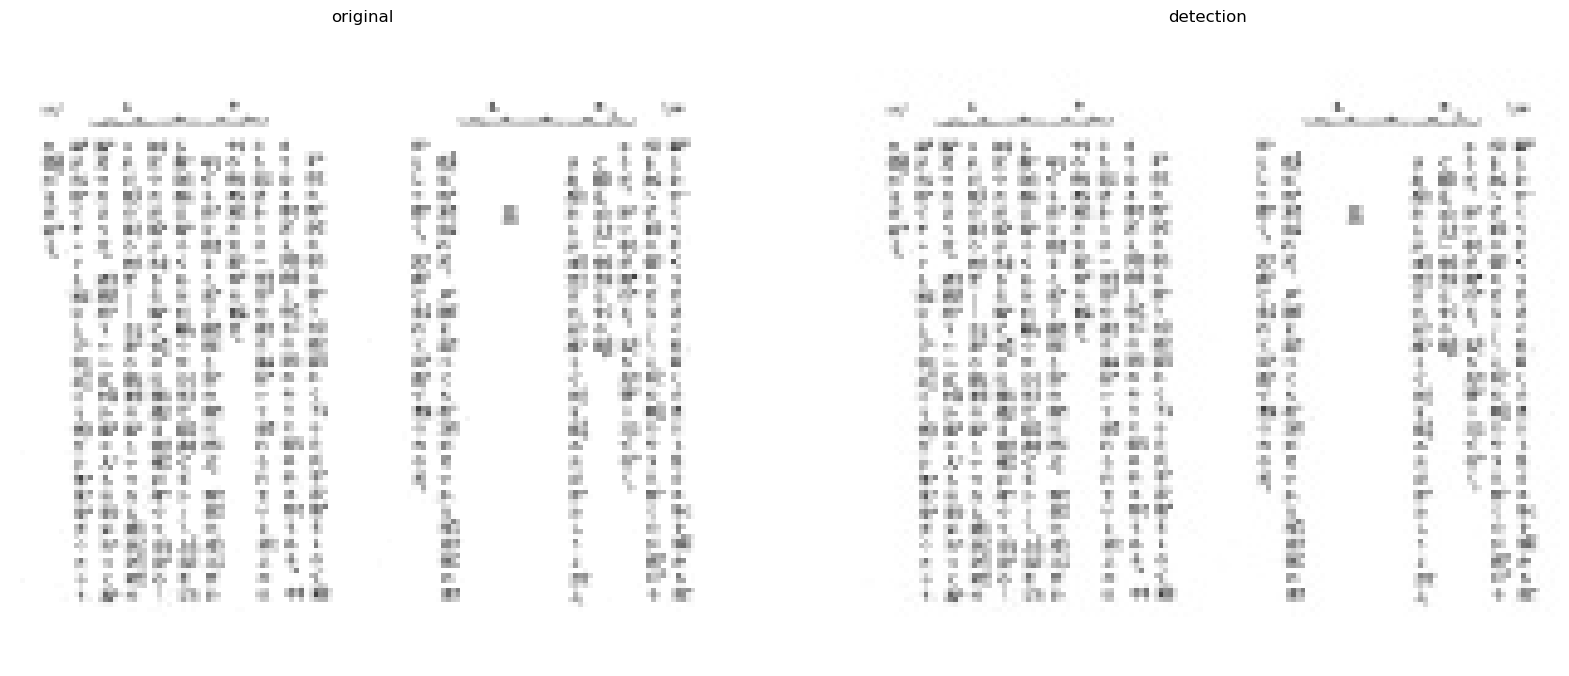

In [21]:
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
for img in os.listdir("C:\\Users\\sanji\\Desktop\\AI-Projects-2\\NeuralMachineTranslation\\DataforOCR"):
    fig = plt.figure(figsize=(20, 14))
    rows = 1
    columns = 2
    Image1 = cv2.imread(f'C:\\Users\\sanji\\Desktop\\AI-Projects-2\\NeuralMachineTranslation\\DataforOCR\\{img}')
    Image2 = mpimg.imread(f'C:\\Users\\sanji\\Desktop\\AI-Projects-2\\NeuralMachineTranslation\\result\\res_{img}'.replace('jpeg','jpg').replace('png', 'jpg').replace('webp','jpg'))
    fig.add_subplot(rows, columns, 1)
    plt.imshow(Image1)
    plt.axis('off')
    plt.title("original")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(Image2)
    plt.axis('off')
    plt.title("detection")
    plt.show()

In [2]:
k = {}

In [3]:
import os
import numpy as np
import cv2
import pandas as pd

def crop(pts, image):

  """
  Takes inputs as 8 points
  and Returns cropped, masked image with a white background
  """
  rect = cv2.boundingRect(pts)
  x,y,w,h = rect
  cropped = image[y:y+h, x:x+w].copy()
  pts = pts - pts.min(axis=0)
  mask = np.zeros(cropped.shape[:2], np.uint8)
  cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
  dst = cv2.bitwise_and(cropped, cropped, mask=mask)
  bg = np.ones_like(cropped, np.uint8)*255
  cv2.bitwise_not(bg,bg, mask=mask)
  dst2 = bg + dst

  return dst2


def generate_words(image_name, score_bbox, image):

  num_bboxes = len(score_bbox)
  for num in range(num_bboxes):
    bbox_coords = score_bbox[num].split(':')[-1].split(',\n')
    if bbox_coords!=['{}']:
      l_t = float(bbox_coords[0].strip(' array([').strip(']').split(',')[0])
      t_l = float(bbox_coords[0].strip(' array([').strip(']').split(',')[1])
      r_t = float(bbox_coords[1].strip(' [').strip(']').split(',')[0])
      t_r = float(bbox_coords[1].strip(' [').strip(']').split(',')[1])
      r_b = float(bbox_coords[2].strip(' [').strip(']').split(',')[0])
      b_r = float(bbox_coords[2].strip(' [').strip(']').split(',')[1])
      l_b = float(bbox_coords[3].strip(' [').strip(']').split(',')[0])
      b_l = float(bbox_coords[3].strip(' [').strip(']').split(',')[1].strip(']'))
      pts = np.array([[int(l_t), int(t_l)], [int(r_t) ,int(t_r)], [int(r_b) , int(b_r)], [int(l_b), int(b_l)]])
      if np.all(pts) > 0:
        
        word = crop(pts, image)
        
        folder = '/'.join( image_name.split('/')[:-1])

        #CHANGE DIR
        dir = 'Resultimgs/'

        if os.path.isdir(os.path.join(dir + folder)) == False :
          os.makedirs(os.path.join(dir + folder))

        try:
          file_name = os.path.join(dir + image_name)
          name = file_name+'_{}_{}_{}_{}_{}_{}_{}_{}.jpg'.format(l_t, t_l, r_t ,t_r, r_b , b_r ,l_b, b_l)
          cv2.imwrite(file_name+'_{}_{}_{}_{}_{}_{}_{}_{}.jpg'.format(l_t, t_l, r_t ,t_r, r_b , b_r ,l_b, b_l), word)
          k[name] = np.sum(pts,axis = 0)/4
          print('Image saved to '+file_name+'_{}_{}_{}_{}_{}_{}_{}_{}.jpg'.format(l_t, t_l, r_t ,t_r, r_b , b_r ,l_b, b_l))
        except:
          continue

data=pd.read_csv('data.csv')

start = "DataforOCR"

for image_num in range(data.shape[0]):
  image = cv2.imread(os.path.join(start, data['image_name'][image_num]))
  image_name = data['image_name'][image_num].strip('.jpg')
  score_bbox = data['word_bboxes'][image_num].split('),')
  generate_words(image_name, score_bbox, image)

Image saved to Resultimgs/Image-2_442.0_248.0_716.0_248.0_716.0_340.0_442.0_340.0.jpg
Image saved to Resultimgs/Image-2_60.86602_248.55487_275.8565_254.87811_273.24805_343.5661_58.25756_337.24286.jpg
Image saved to Resultimgs/Image-2_729.30304_256.15295_949.77704_253.49666_950.8084_339.0987_730.3344_341.755.jpg
Image saved to Resultimgs/Image-2_305.2_254.40002_420.63397_259.41888_417.0415_342.0453_301.60754_337.02643.jpg
Image saved to Resultimgs/Image-2_966.25055_266.52206_1099.4296_262.605_1101.6318_337.4814_968.45276_341.39847.jpg
Image saved to Resultimgs/Image-2_531.4346_362.39432_744.3539_369.73636_740.94775_468.51547_528.02844_461.17343.jpg
Image saved to Resultimgs/Image-2_794.9131_370.2589_989.4442_367.31146_990.9049_463.71356_796.3738_466.661.jpg
Image saved to Resultimgs/Image-2_56.68016_369.55002_391.51685_394.17038_384.3045_492.25772_49.46785_467.63736.jpg
Image saved to Resultimgs/Image-2_740.0_374.0_786.0_374.0_786.0_460.0_740.0_460.0.jpg
Image saved to Resultimgs/Image-

In [4]:
k

{'Resultimgs/Image-2_442.0_248.0_716.0_248.0_716.0_340.0_442.0_340.0.jpg': array([579., 294.]),
 'Resultimgs/Image-2_60.86602_248.55487_275.8565_254.87811_273.24805_343.5661_58.25756_337.24286.jpg': array([166.5, 295.5]),
 'Resultimgs/Image-2_729.30304_256.15295_949.77704_253.49666_950.8084_339.0987_730.3344_341.755.jpg': array([839.5 , 297.25]),
 'Resultimgs/Image-2_305.2_254.40002_420.63397_259.41888_417.0415_342.0453_301.60754_337.02643.jpg': array([360.75, 298.  ]),
 'Resultimgs/Image-2_966.25055_266.52206_1099.4296_262.605_1101.6318_337.4814_968.45276_341.39847.jpg': array([1033.5,  301.5]),
 'Resultimgs/Image-2_531.4346_362.39432_744.3539_369.73636_740.94775_468.51547_528.02844_461.17343.jpg': array([635.75, 415.  ]),
 'Resultimgs/Image-2_794.9131_370.2589_989.4442_367.31146_990.9049_463.71356_796.3738_466.661.jpg': array([892.25, 416.5 ]),
 'Resultimgs/Image-2_56.68016_369.55002_391.51685_394.17038_384.3045_492.25772_49.46785_467.63736.jpg': array([220. , 430.5]),
 'Resultimgs/I

In [6]:
import matplotlib.pyplot as plt

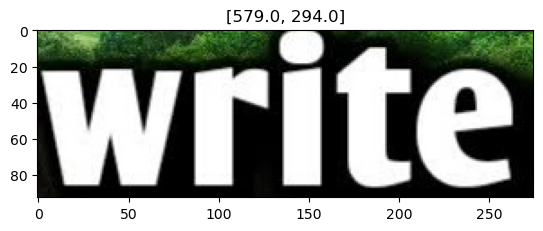

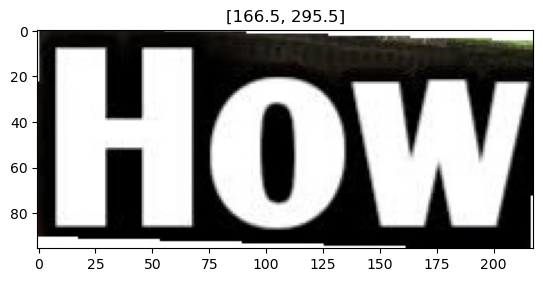

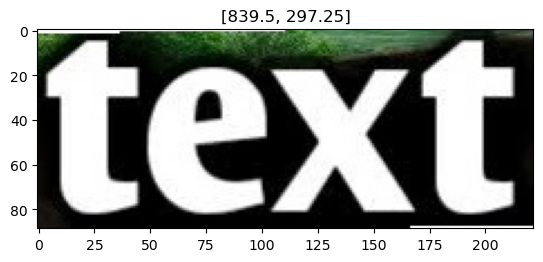

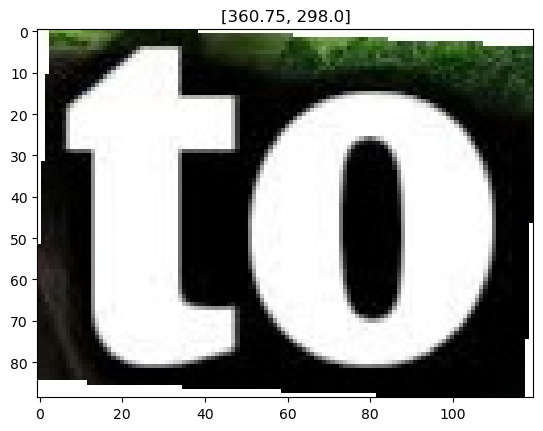

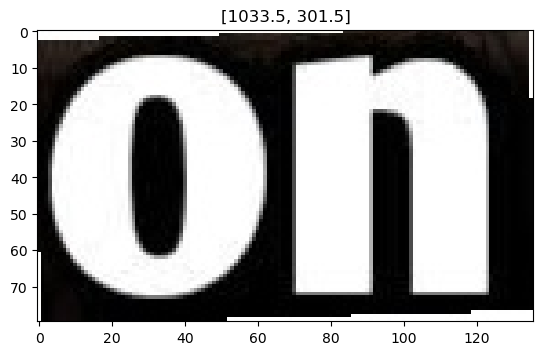

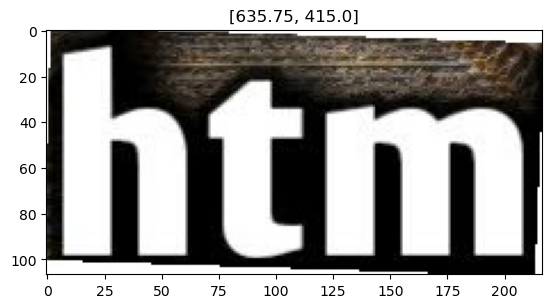

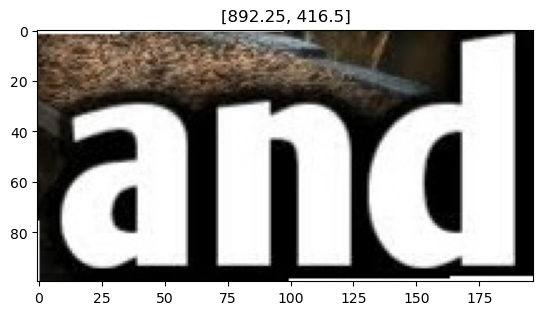

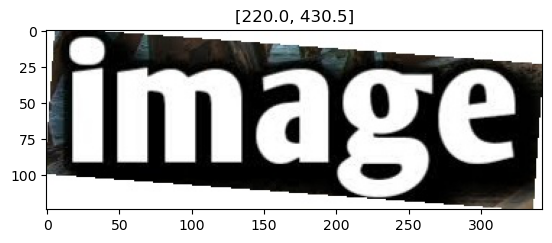

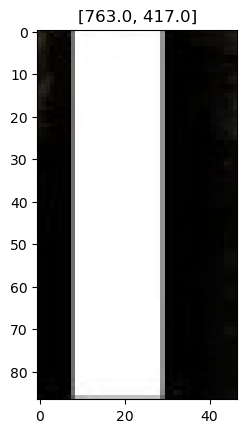

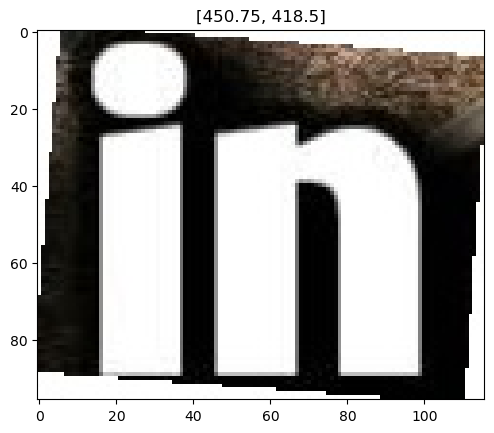

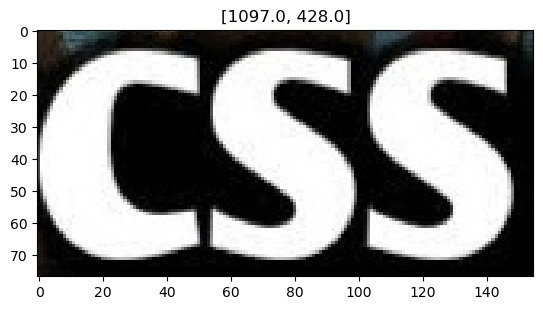

In [26]:
for i,j in k.items():
    img = plt.imread(i)
    plt.imshow(img)
    plt.title(list(j))
    plt.show()

In [5]:
k.values()

dict_values([array([579., 294.]), array([166.5, 295.5]), array([839.5 , 297.25]), array([360.75, 298.  ]), array([1033.5,  301.5]), array([635.75, 415.  ]), array([892.25, 416.5 ]), array([220. , 430.5]), array([763., 417.]), array([450.75, 418.5 ]), array([1097.,  428.])])

In [7]:
s = list(map(list,k.values()))

In [6]:
k

{'Resultimgs/Image-2_442.0_248.0_716.0_248.0_716.0_340.0_442.0_340.0.jpg': array([579., 294.]),
 'Resultimgs/Image-2_60.86602_248.55487_275.8565_254.87811_273.24805_343.5661_58.25756_337.24286.jpg': array([166.5, 295.5]),
 'Resultimgs/Image-2_729.30304_256.15295_949.77704_253.49666_950.8084_339.0987_730.3344_341.755.jpg': array([839.5 , 297.25]),
 'Resultimgs/Image-2_305.2_254.40002_420.63397_259.41888_417.0415_342.0453_301.60754_337.02643.jpg': array([360.75, 298.  ]),
 'Resultimgs/Image-2_966.25055_266.52206_1099.4296_262.605_1101.6318_337.4814_968.45276_341.39847.jpg': array([1033.5,  301.5]),
 'Resultimgs/Image-2_531.4346_362.39432_744.3539_369.73636_740.94775_468.51547_528.02844_461.17343.jpg': array([635.75, 415.  ]),
 'Resultimgs/Image-2_794.9131_370.2589_989.4442_367.31146_990.9049_463.71356_796.3738_466.661.jpg': array([892.25, 416.5 ]),
 'Resultimgs/Image-2_56.68016_369.55002_391.51685_394.17038_384.3045_492.25772_49.46785_467.63736.jpg': array([220. , 430.5]),
 'Resultimgs/I

In [16]:
def sort_coordinates(coordinates):
    sorted_coords = sorted(coordinates, key=lambda coord: (coord[1], coord[0]))
    return sorted_coords
f = sort_coordinates(s)
f

[[579.0, 294.0],
 [166.5, 295.5],
 [839.5, 297.25],
 [360.75, 298.0],
 [1033.5, 301.5],
 [635.75, 415.0],
 [892.25, 416.5],
 [763.0, 417.0],
 [450.75, 418.5],
 [1097.0, 428.0],
 [220.0, 430.5]]

In [14]:
def sort_coordinates(coordinates):
    sorted_coords = sorted(coordinates, key=lambda coord: (coord[0], coord[1]))
    return sorted_coords
sort_coordinates(f)

[[166.5, 295.5],
 [220.0, 430.5],
 [360.75, 298.0],
 [450.75, 418.5],
 [579.0, 294.0],
 [635.75, 415.0],
 [763.0, 417.0],
 [839.5, 297.25],
 [892.25, 416.5],
 [1033.5, 301.5],
 [1097.0, 428.0]]

In [ ]:
k = []
axis = 0
def sort(sorted_coordinates):
    i = 0
    while i<len(sorted_coordinates):
        